Project On CharityML 

IMPORTING DATASET

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot 
dataset=pd.read_csv("Downloads//census.csv")
dataset.head(5)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


Describing Datasets

In [2]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [3]:
dataset.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Filtering datasets

In [4]:
y=dataset['income']
X_raw=dataset.drop('income',axis= 1)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
income=le.fit_transform(y)
income

array([0, 0, 0, ..., 0, 0, 1])

In [6]:
income

array([0, 0, 0, ..., 0, 0, 1])

In [7]:

data=['capital-gain','capital-loss']
features_log_transformed = pd.DataFrame(X_raw)
features_log_transformed[data] = X_raw[data].apply(lambda x: np.log(x + 1))

In [8]:
features_log_transformed

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.000000,0.0,40.0,United-States
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,36.0,United-States
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,50.0,United-States
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,8.604471,0.0,40.0,United-States


In [9]:
from sklearn.preprocessing import StandardScaler
numerical_data= ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
features_log_ss_transform = pd.DataFrame(features_log_transformed)
features_log_ss_transform[numerical_data]=scaler.fit_transform(features_log_transformed[numerical_data])

In [10]:
features_log_ss_transform=features_log_ss_transform.drop('race',axis=1)
features_log_ss_transform=features_log_ss_transform.drop('relationship',axis=1)
features_log_ss_transform=features_log_ss_transform.drop('education_level',axis=1)

In [11]:
features_log_ss_transform

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.034201,State-gov,1.128753,Never-married,Adm-clerical,Male,2.815336,-0.222752,-0.078120,United-States
1,0.866417,Self-emp-not-inc,1.128753,Married-civ-spouse,Exec-managerial,Male,-0.300328,-0.222752,-2.326738,United-States
2,-0.041455,Private,-0.438122,Divorced,Handlers-cleaners,Male,-0.300328,-0.222752,-0.078120,United-States
3,1.093385,Private,-1.221559,Married-civ-spouse,Handlers-cleaners,Male,-0.300328,-0.222752,-0.078120,United-States
4,-0.798015,Private,1.128753,Married-civ-spouse,Prof-specialty,Female,-0.300328,-0.222752,-0.078120,Cuba
...,...,...,...,...,...,...,...,...,...,...
45217,-0.419735,Private,1.128753,Never-married,Prof-specialty,Male,-0.300328,-0.222752,-0.078120,United-States
45218,0.034201,Private,1.128753,Divorced,Prof-specialty,Female,-0.300328,-0.222752,-0.411249,United-States
45219,-0.041455,Private,1.128753,Married-civ-spouse,Prof-specialty,Male,-0.300328,-0.222752,0.754701,United-States
45220,0.412481,Private,1.128753,Divorced,Adm-clerical,Male,3.188207,-0.222752,-0.078120,United-States


In [12]:
from sklearn.preprocessing import OneHotEncoder

features_final= pd.get_dummies(features_log_ss_transform)

In [13]:
features_final

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.034201,1.128753,2.815336,-0.222752,-0.078120,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.866417,1.128753,-0.300328,-0.222752,-2.326738,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.041455,-0.438122,-0.300328,-0.222752,-0.078120,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.093385,-1.221559,-0.300328,-0.222752,-0.078120,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.798015,1.128753,-0.300328,-0.222752,-0.078120,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.419735,1.128753,-0.300328,-0.222752,-0.078120,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0.034201,1.128753,-0.300328,-0.222752,-0.411249,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,-0.041455,1.128753,-0.300328,-0.222752,0.754701,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.412481,1.128753,3.188207,-0.222752,-0.078120,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


<ipython-input-14-e66d9d19b9a8>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  features_final.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C90A37F130>,
      dtype=object)

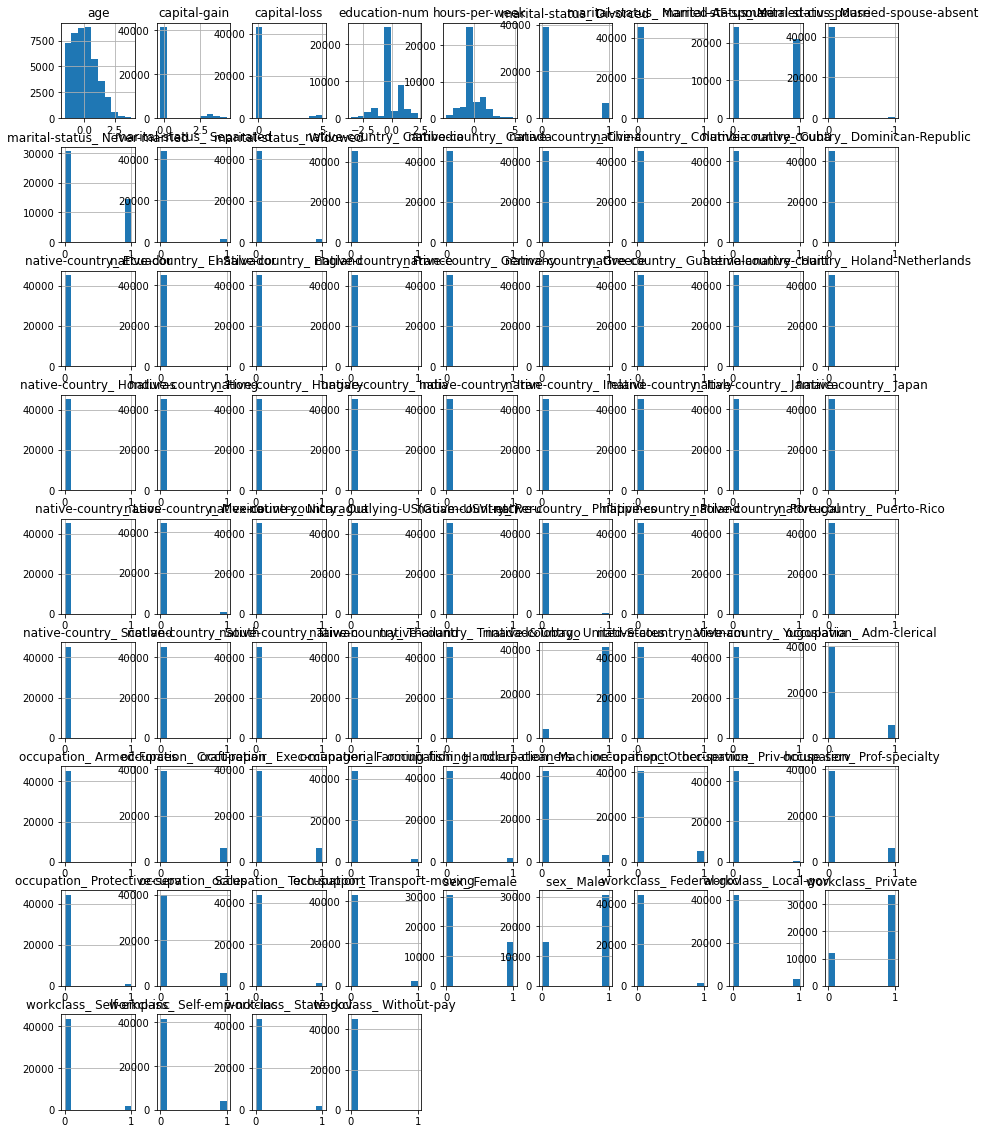

In [14]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
features_final.hist(ax=ax)

Spliting datasets

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train, y_test =train_test_split(features_final,income,test_size=0.25,random_state=0)

In [16]:
X_train,X_test , y_train, y_test

(            age  education-num  capital-gain  capital-loss  hours-per-week  \
 36418  0.261169       1.128753     -0.300328     -0.222752       -0.078120   
 1080  -1.403263       0.345316     -0.300328     -0.222752       -0.910942   
 17957 -0.798015      -0.438122     -0.300328     -0.222752       -0.078120   
 13607 -1.100639      -0.046403     -0.300328     -0.222752        0.088444   
 43125  0.185513      -0.438122     -0.300328     -0.222752       -0.078120   
 ...         ...            ...           ...           ...             ...   
 30403 -0.722359      -0.046403     -0.300328     -0.222752       -0.078120   
 21243  0.034201       0.345316     -0.300328     -0.222752        1.587523   
 42613  1.471665       1.128753     -0.300328     -0.222752        1.171112   
 43567  1.320353      -0.438122     -0.300328     -0.222752       -0.078120   
 2732  -0.344079      -0.438122      2.987540     -0.222752       -0.494531   
 
        workclass_ Federal-gov  workclass_ Local-g

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred

C:\Users\91730\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 1, 1])

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score


In [20]:
accuracy_score(y_test,pred)

0.8423845745621794

In [21]:
fbeta_score(y_test,pred,beta=0.5)

0.6821425572999747

KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
pred1=neigh.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 1, 1])

In [24]:
accuracy_score(y_test,pred1)


0.8277021050769503

In [25]:
fbeta_score(y_test,pred1,beta=0.5)

0.6452226874762086

GaussianNB

In [26]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  

GaussianNB()

In [27]:
pred2=gnb.predict(X_test)
pred2

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
accuracy_score(y_test,pred2)

0.4509110206969751

In [29]:
fbeta_score(y_test,pred2,beta=0.5)

0.34769140385077574

AdaBoostClassifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(random_state=42)
ad.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [31]:
pred3=ad.predict(X_test)

In [32]:
accuracy_score(y_test,pred3)

0.8570670440474084

In [33]:
fbeta_score(y_test,pred3,beta=0.5)

0.7217268473558753

from the above choosen three algortihms we can clearly see that Adaboost gives the best accuracy from now we will choose adaboost as the best model for this dataset and perform model tuning and find final results.

Performing model tuning and finding the best prediction using gridsearchCv

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5,random_state=42))
parameters = {'n_estimators':[5,10,15,20,25],'learning_rate':[1,0.1,0.01,0.001]}
scorer = make_scorer(fbeta_score, beta=0.5)
grid = GridSearchCV(clf,parameters,scorer) 
   
# fitting the model for grid search 
grid_fit=grid.fit(X_train, y_train) 
 
predictions = (clf.fit(X_train, y_train)).predict(X_test)
optimised_predictions = grid_fit.predict(X_test)

print(predictions)
print(optimised_predictions)

   


C:\Users\91730\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [36]:
print(accuracy_score(y_test, predictions))
print(fbeta_score(y_test, predictions, beta = 0.5))
print("\nPrediction after optimising the model\n")
print(accuracy_score(y_test, optimised_predictions))
print(fbeta_score(y_test, optimised_predictions, beta = 0.5))


0.8622855121174597
0.7232008847460305

Prediction after optimising the model

0.8636122412878118
0.7439398161047646
